<a href="https://colab.research.google.com/github/BankNatchapol/ML-Algorithm/blob/master/Regularized_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regularized Logistic Regression**
---

ในการทำ regularization กับ Logistic Regression idea ในการทำจะไม่ต่างกับตัว Linear Regression มาก ต่างกันเพียงแค่ใน cost function 

![alt text](https://github.com/BankNatchapol/ML-Algorithm/blob/master/overfitting.jpg?raw=true)

โดย cost function ของ Regularized Logisti Regression จะเป็น<br><br>
\begin{equation}
J(\theta) = -\frac{1}{m}\sum^m_{i=1}[y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum^n_{j=1}\theta_j^2
\end{equation}
<br>
โดยมีการเพิ่ม Regularization term เพิ่มเข้ามา แต่ใน Gradient จะมีสมการที่เหมือนกับใน Linear Regression เพราะว่าเมื่อทำ Differential จะได้ผลลัพท์เหมือนกัน<br><br>
\begin{equation}
\theta_0 := \theta_0-\alpha\frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_0
\end{equation}
<br>
\begin{equation}
\theta_j := \theta_j-\alpha(\frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j +\frac{\lambda}{m}\theta_j)
\end{equation}

In [0]:
from sklearn.datasets import make_blobs
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ลองดูข้อมูล

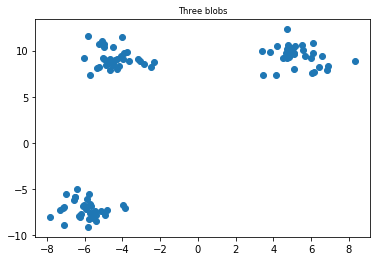

In [381]:
plt.title("Three blobs", fontsize='small')
X, Y1 = make_blobs(n_features=2, centers=3,random_state=31)
plt.scatter(X[:, 0], X[:, 1], marker='o');

In [0]:
c = np.ones([len(X),3]) # add ones column to X
c[:,1:] = X
X = c

สร้าง function sigmoid, hypothesis, cost, jacobian

In [0]:
def sigmoid(z): #sigmoid function  
    return 1/(1+np.exp(-1*z)) 

def hypo(theta,x): #hypothesis function  
    return sigmoid(np.dot(theta,X.T)).T

def rcost(theta,x,y):
   cost = (hypo(theta,x).T - y).T
   return cost

def cost(theta): #cost function  
    m = len(X)
    h = hypo(theta,X)  
    cost = -np.dot(Y,np.log(h))-np.dot(np.log(1-h).T,(1-Y.T))
    o = np.ones([len(X[0,:]),1])
    o[0,:] = 0
    reg = np.dot((theta**2),o)
    return ((1/m)*cost+(lamb/(2*m))*reg)[0]

def Jac(theta):
    m = len(X) 
    frac = (alpha*lamb/m)
    mfrac = frac * np.ones([len(X[0,:]),1])
    mfrac[0,:] = 0
    upd =  (alpha/m)*np.dot(X.T,rcost(theta,X,Y)) + theta*mfrac.T
    return upd[0]

ทำการ optimize ด้วย Newton-Quasi algorithm<br>
ซึ่งจะได้ผลลัพท์เป็น parameter ของ 3 กลุ่ม

In [384]:
lamb = 0
alpha = 0.01
Y=np.array(list(map(int,Y1==0))) # use Newton Quasi to optimize
result1 = optimize.minimize(cost,[0,0,0],method="Newton-CG",jac=Jac)
Y=np.array(list(map(int,Y1==1)))
result2 = optimize.minimize(cost,[0,0,0],method="Newton-CG",jac=Jac)
Y=np.array(list(map(int,Y1==2)))
result3 = optimize.minimize(cost,[0,0,0],method="Newton-CG",jac=Jac)
print(f'result1.x = {result1.x}\nresult2.x = {result2.x}\nresult3.x = {result3.x}')

result1.x = [-12.35351387  -2.18875341   1.45633958]
result2.x = [-0.17033558  2.36211963 -0.11962775]
result3.x = [-0.02355813 -0.22847152 -1.22151205]


ทำการแบ่งประเภทของกลุ่มต่างๆไว้ใน list colors

In [0]:
def hypoi(x): #find all hypothesis of all point
  a = sigmoid(np.dot(result1.x,x.T))
  b = sigmoid(np.dot(result2.x,x.T))
  c = sigmoid(np.dot(result3.x,x.T))
  return [a,b,c]
  
def fmax(a):
  return max(enumerate(a),key=lambda x: x[1])[0]

In [0]:
q = np.array(hypoi(X)).T
colors = list(map(lambda x:np.array(list(map(int,x>0.5))),hypoi(X))) # create array of data group
colors3 = list(map(fmax,q))

นำ parameter ที่ได้มาทำเป็น boundary ของข้อมูล จะได้เส้นที่ใช้แบ่งกลุ่ม


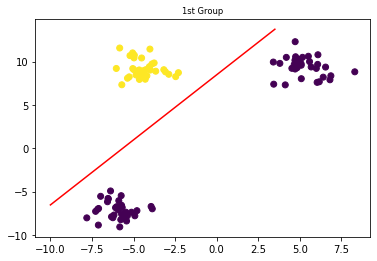

In [387]:
plt.title("1st Group", fontsize='small')
plt.scatter(X[:, 1], X[:, 2], marker='o',c=colors[0]);
x1=np.arange(-10,4,0.5)
y1=(-(np.arange(-10,4,0.5)*result1.x[1])-result1.x[0])/(result1.x[2])
plt.plot(x1,y1,'r');

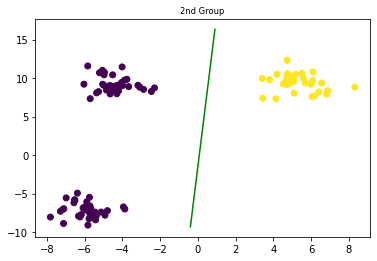

In [388]:
plt.title("2nd Group", fontsize='small')
plt.scatter(X[:, 1], X[:, 2], marker='o',c=colors[1]);
x2=np.arange(-0.4,1,0.1)
y2=(-(np.arange(-0.4,1,0.1)*result2.x[1])-result2.x[0])/(result2.x[2])
plt.plot(x2,y2,'g');


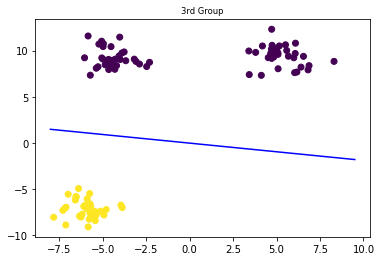

In [389]:
Y=np.array(list(map(int,Y1==2)))
plt.title("3rd Group", fontsize='small')
plt.scatter(X[:, 1], X[:, 2], marker='o',c=colors[2]);
x3=np.arange(-8,10,0.5)
y3=(-(np.arange(-8,10,0.5)*result3.x[1])-result3.x[0])/(result3.x[2])
plt.plot(x3,y3,'b');

และเมื่อนำเส้นแบ่งกลุ่มทั้งหมดมารวมกันและแยกสีจะได้ดังภาพ

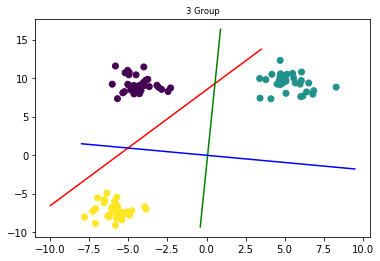

In [390]:
plt.title("3 Group", fontsize='small')
plt.scatter(X[:, 1], X[:, 2], marker='o',c=colors3);
x1=np.arange(-10,4,0.5)
y1=(-(np.arange(-10,4,0.5)*result1.x[1])-result1.x[0])/(result1.x[2])
plt.plot(x1,y1,'r');
x2=np.arange(-0.4,1,0.1)
y2=(-(np.arange(-0.4,1,0.1)*result2.x[1])-result2.x[0])/(result2.x[2])
plt.plot(x2,y2,'g');
x3=np.arange(-8,10,0.5)
y3=(-(np.arange(-8,10,0.5)*result3.x[1])-result3.x[0])/(result3.x[2])
plt.plot(x3,y3,'b');